Matus Halak Data Processing Final Project (pytorch)

Start off easy: MNIST digit classification
MNIST dataset
70,000 labeled images of handdrawn digits 0-9

In [13]:
# Pytorch modules
import torch
# main class used for making neural networks
from torch import nn
# pytorch has all the datasets I need already in its computer vision module
from torchvision import datasets
# used to parallelize loading (my laptop has only 4 cores)
from torch.utils.data import DataLoader
# used to transform input data into desired format
from torchvision import transforms

# general python modules
import os
import numpy as np
from matplotlib import pyplot as plt

print('all modules imported!')

all modules imported!


In [6]:
# define transformations we will apply to images before using them
transform = transforms.Compose([
    # same size all (MNIST images 28x28)
    transforms.Resize([28,28]),
    # transform all to greyscale
    transforms.Grayscale(),
    # transform to tensor representation
    transforms.ToTensor()])

# get the MNIST data and apply our transform to it and save to same directory
mnist = datasets.MNIST(root='.', # same directory
                       download=True, 
                       transform = transform)

In [9]:
# batch size seems to be a parameter that one can play with a lot
# will try different ones (apparently smaller batch size = faster training but more noise)

# iterator of the dataset (always returns the n = batch size of 
# images with labels in each iteration)
dataloader = DataLoader(dataset = mnist, 
                        batch_size = 64,
                        num_workers = 4) # 4 cpu cores on my laptop

image, label = next(iter(dataloader))

print('One batch:', image.shape)

One batch: torch.Size([64, 1, 28, 28])


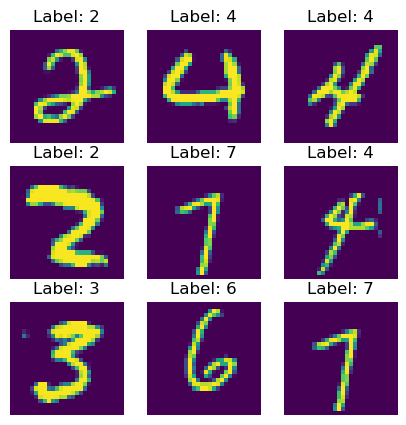

In [14]:
from numpy.random import randint
fig, axes = plt.subplots(3,3,figsize = (5,5))
axes = axes.flatten()
for ax, image_eg in enumerate(randint(0,64,size = 9)):
    axes[ax].set_title(f'Label: {label[image_eg]}')
    axes[ax].axis('off')
    axes[ax].imshow(transforms.ToPILImage()(image[image_eg]))
# Example data
plt.show()

Building a NN
-  input layer: 28x28 = 784 inputs(image size) (value 0-1, normalized)
-  hidden layer(s): hard to determine parameters, need to play around
    - how many layers ?
    - how many nodes ? - more than input layer?
- output layer: 10 outputs (digits 0-9) (value 0-1; the output with the highest value is the predicted label)
- weights between nodes of different layers (value 0-1; initiallize randomly)
- each node in hidden & output layers performs a weighed sum (or some other operation) on the node 'output' values and weights from previous layer
- an activation function and bias determines how this 'weighed sum' will be reflected in the 'output' of the current node

In [22]:
# fully connected (fc) block (will repeat for multiple hidden layers)
def fc_block(input_size:int,
            output_size:int,
            activation_function:object):
    return nn.Sequential(
        # how to perform "weighed sum" on 'output' of previous layer
        nn.Linear(input_size,output_size),
        # what to do with "weighed sum"
        activation_function())
    
# start with fully connected network
class My_First_NN (nn.Module):
    def __init__(self,
                 in_channels:int,
                 hidden_layers_sizes:list,
                 out_channels:int,
                activation:object):
        # initialize whatever is in __init__ of nn.Module
        super().__init__()
        # this one way how input & hidden layers can be defined
        # sizes (number of nodes) of each layer
        layer_sizes = [in_channels,*hidden_layers_sizes]
        # make blocks of fully connected layers 
        fully_connected_blocks = [fc_block(in_n, out_n, activation)
                                  for in_n, out_n in zip(layer_sizes, layer_sizes[1:])]
        # these will be sequentially executed in the forward pass
        self.layers = nn.Sequential(*fully_connected_blocks, 
                                    nn.Linear(layer_sizes[-1],out_channels))
        
        def forward(self, x):
            # flatten input
            x = x.view(x.size(0),-1)
            # forward pass of input through network
            x = self.layers(x)
            # at the end, x is a list of 10 numbers from 0-10 telling us
            # which label the model predicts
            return x

first_model = My_First_NN(784,
                          # completely arbitrary number of hidden layers & nodes
                         [300,200,300],
                         10,
                         nn.ReLU)
# inspect model architecture
print(first_model) # yes, as intended

My_First_NN(
  (layers): Sequential(
    (0): Sequential(
      (0): Linear(in_features=784, out_features=300, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=300, out_features=200, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=200, out_features=300, bias=True)
      (1): ReLU()
    )
    (3): Linear(in_features=300, out_features=10, bias=True)
  )
)


Make some CNNs and some FCNs

In [ ]:
# for working with our images for later
from PIL import Image as img
